In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Carga de datos
indices = pd.read_excel('indices_pobreza.xlsx', engine='openpyxl', skiprows=3)

In [ ]:
paises_escogidos = ['ARG', 'COL', 'USA', 'ITA', 'LUX', 'KAZ', 'IRN', 'TGO', 'TUN']
paises_escogidos = {pais:indices[(indices['Indicator Code'] == 'SI.POV.GINI') & (indices['Country Code'] == pais)]['Country Name'].iloc[0] for pais in paises_escogidos}
paises_escogidos['IRN'] = 'Irán'
paises_escogidos['KAZ'] = 'Kazajistán'

In [ ]:
indices = indices[indices['Country Code'].isin(paises_escogidos.keys())]

In [ ]:
desigualdad = indices[indices['Indicator Code'] == 'SI.POV.GINI'][['Country Code'] + [str(i) for i in range(2009,2024)]]

In [ ]:
pobreza = indices[indices['Indicator Code'] == 'SI.POV.UMIC'][['Country Code'] + [str(i) for i in range(2009,2024)]]

# Punto 1

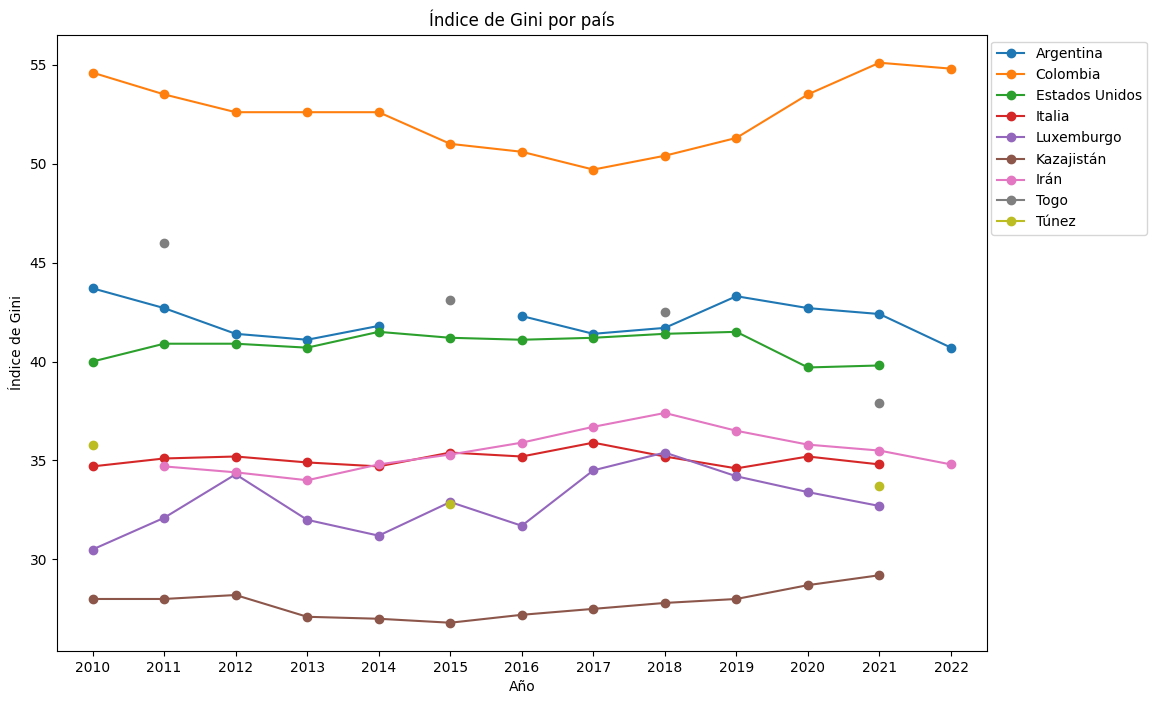

In [ ]:
x = np.arange(2010, 2023, 1)

fig, ax = plt.subplots(figsize=(12, 8))

for pais in paises_escogidos.keys():
    # Filtrar y obtener los datos de Gini para el país actual
    datos_pais = desigualdad[desigualdad['Country Code'] == pais].iloc[:, 2:-1].values.flatten().astype(float)

    # Graficar línea con puntos para el país actual
    ax.plot(x, datos_pais, marker='o', linestyle='-', label=paises_escogidos[pais])

# Configuración del gráfico
ax.legend(loc='upper right', bbox_to_anchor=(1.18, 1))
ax.set_title('Índice de Gini por país')
ax.set_xlabel('Año')
ax.set_ylabel('Índice de Gini')
ax.set_xlim(min(x)-0.5, max(x)+0.5)
ax.set_xticks(x)

plt.show()

# Punto 2

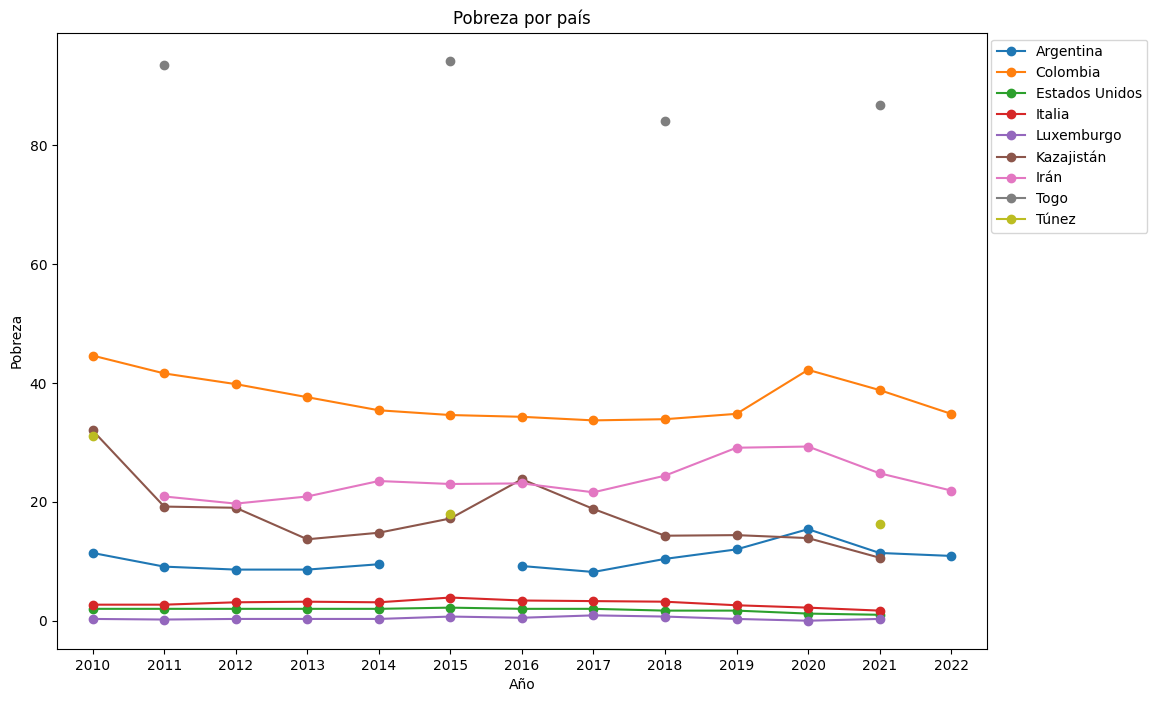

In [ ]:
x = np.arange(2010, 2023, 1)

fig, ax = plt.subplots(figsize=(12, 8))

for pais in paises_escogidos.keys():
    # Filtrar y obtener los datos de Gini para el país actual
    datos_pais = pobreza[pobreza['Country Code'] == pais].iloc[:, 2:-1].values.flatten().astype(float)

    # Graficar línea con puntos para el país actual
    ax.plot(x, datos_pais, marker='o', linestyle='-', label=paises_escogidos[pais])

# Configuración del gráfico
ax.legend(loc='upper right', bbox_to_anchor=(1.18, 1))
ax.set_title('Pobreza por país')
ax.set_xlabel('Año')
ax.set_ylabel('Pobreza')
ax.set_xlim(min(x)-0.5, max(x)+0.5)
ax.set_xticks(x)

plt.show()

# Punto 3

In [ ]:
def imputacion(df):
    df.dropna(how='all', inplace=True)
    for col in [2010, 2016, 2022]:
        col_str = str(col)
        prev_col = str(col - 1)
        next_col = str(col + 1)

        # Crear una serie con los valores imputados basados en el promedio si ambos existen
        imputacion_promedio = df[prev_col].add(df[next_col]) / 2

        # Crear una serie con los valores del año anterior si existe
        imputacion_anterior = df[prev_col]

        # Crear una serie con los valores del año siguiente si existe
        imputacion_siguiente = df[next_col]

        # Llenar los valores usando el promedio primero, luego el año anterior, y finalmente el año siguiente
        df[col_str] = df[col_str].combine_first(imputacion_promedio)
        df[col_str] = df[col_str].combine_first(imputacion_anterior)
        df[col_str] = df[col_str].combine_first(imputacion_siguiente)

    df.dropna(subset=['2010', '2016', '2022'], inplace=True)

In [ ]:
desigualdad.set_index('Country Code', inplace=True)
imputacion(desigualdad)

In [ ]:
pobreza.set_index('Country Code', inplace=True)
imputacion(pobreza)

In [ ]:
def dispersion_paises(year, X, y):
  cmap = plt.cm.get_cmap('viridis', len(X))

  plt.scatter(X, y, c=[cmap(i) for i in range(len(X))])

  # Use the colormap for the legend as well
  for i, pais in enumerate(list(y.index)):
      plt.scatter([], [], c=[cmap(i)], label=paises_escogidos[pais])
  plt.legend()

  plt.xlabel('Desigualdad')
  plt.ylabel('Pobreza')
  plt.title('Desigualdad Vs Pobreza' + year)
  plt.show()

<ipython-input-78-708046789a0a>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(X))


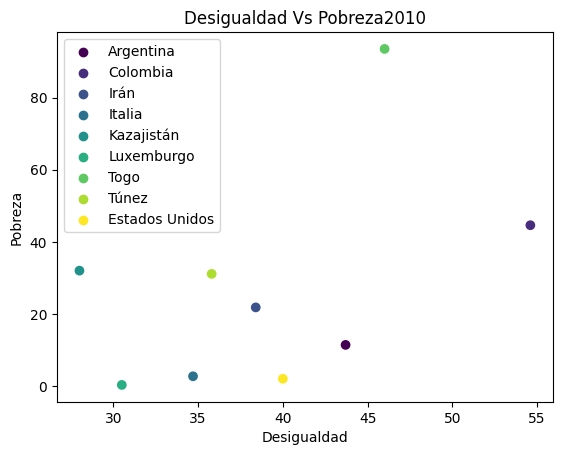

In [ ]:
dispersion_paises('2010', desigualdad['2010'], pobreza['2010'])

<ipython-input-78-708046789a0a>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(X))


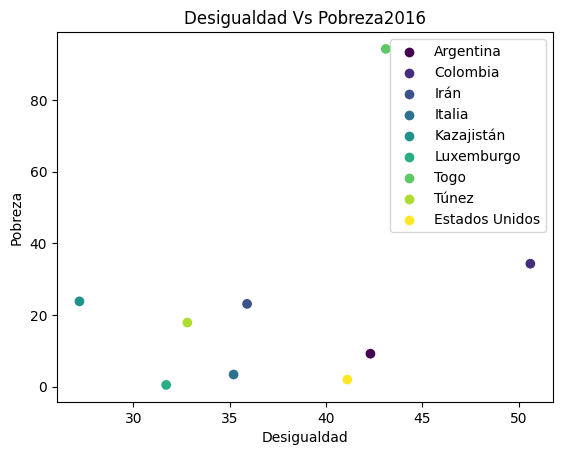

In [ ]:
dispersion_paises('2016', desigualdad['2016'], pobreza['2016'])

<ipython-input-78-708046789a0a>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(X))


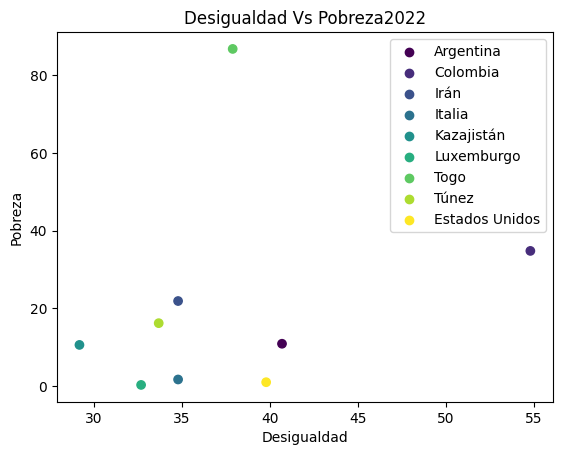

In [ ]:
dispersion_paises('2022', desigualdad['2022'], pobreza['2022'])

In [ ]:
def dispersion_regresion(year, X, y, regresion):
  y_pred = regresion.predict(X)

  # Get the colormap
  cmap = plt.cm.get_cmap('viridis', len(X))

  plt.scatter(X, y, c=[cmap(i) for i in range(len(X))]) # Use the colormap to get colors
  plt.plot(X, y_pred, color='blue')

  # Use the colormap for the legend as well
  for i, pais in enumerate(list(y.index)):
      plt.scatter([], [], c=[cmap(i)], label=paises_escogidos[pais])
  plt.legend()

  plt.xlabel('Desigualdad')
  plt.ylabel('Pobreza')
  plt.title('Desigualdad Vs Pobreza ' + year)
  plt.show()

## Regresión Para 2010

In [ ]:
X = desigualdad['2010'].to_numpy().reshape((len(desigualdad), 1))
y = pobreza['2010']
regr_2010 = LinearRegression().fit(X, y)

In [ ]:
print('Recta de ajuste de mínimos cuadrados para el año 2010')
print('\tPendiente:', regr_2010.coef_)
print('\tCorte con el eje y:', regr_2010.intercept_)

Recta de ajuste de mínimos cuadrados para el año 2010
	Pendiente: [1.68941776]
	Corte con el eje y: -39.41869196341861


<ipython-input-82-143b75df8b9b>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(X))


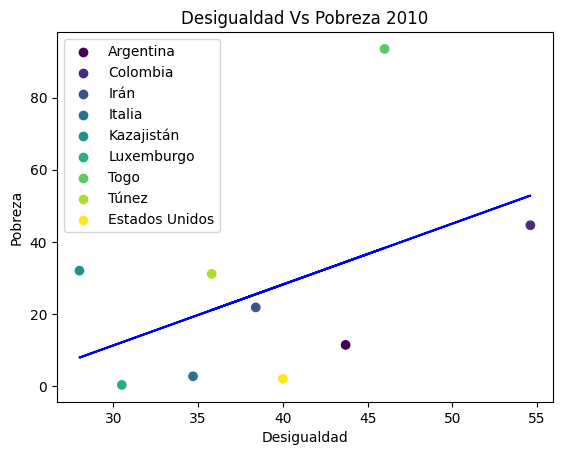

In [ ]:
dispersion_regresion('2010', X, y, regr_2010)

## Regresión Para 2016

In [ ]:
X = desigualdad['2016'].to_numpy().reshape((len(desigualdad), 1))
y = pobreza['2016']
regr_2016 = LinearRegression().fit(X, y)

In [ ]:
print('Recta de ajuste de mínimos cuadrados para el año 2016')
print('\tPendiente:', regr_2016.coef_)
print('\tCorte con el eje y:', regr_2016.intercept_)

Recta de ajuste de mínimos cuadrados para el año 2016
	Pendiente: [1.46001634]
	Corte con el eje y: -31.984394880174282


<ipython-input-82-143b75df8b9b>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(X))


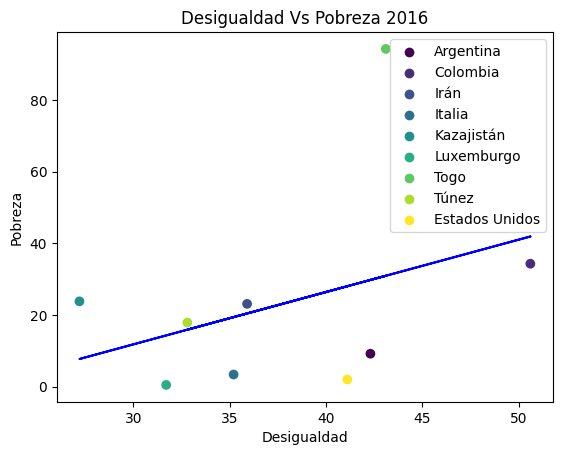

In [ ]:
dispersion_regresion('2016', X, y, regr_2016)

## Regresión Para 2022

In [ ]:
X = desigualdad['2022'].to_numpy().reshape((len(desigualdad), 1))
y = pobreza['2022']
regr_2022 = LinearRegression().fit(X, y)

In [ ]:
print('Recta de ajuste de mínimos cuadrados para el año 2022')
print('\tPendiente:', regr_2022.coef_)
print('\tCorte con el eje y:', regr_2022.intercept_)

Recta de ajuste de mínimos cuadrados para el año 2022
	Pendiente: [1.01142621]
	Corte con el eje y: -17.56295888399413


<ipython-input-82-143b75df8b9b>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(X))


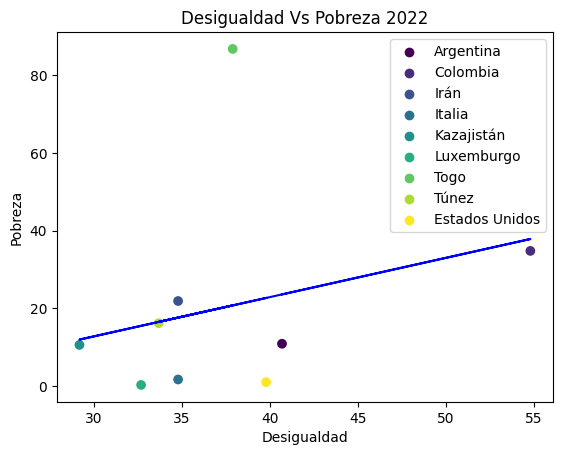

In [ ]:
dispersion_regresion('2022', X, y, regr_2022)